In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('hmnist_28_28_RGB.csv')

In [ ]:
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [ ]:
fractions=np.array([0.8,0.2])

df=df.sample(frac=1)

train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [ ]:
print(len(train_set))

8012


In [ ]:
print(len(test_set))

2003


In [ ]:
df.label.unique()

array([4, 0, 2, 1, 6, 5, 3])

In [ ]:
import seaborn as sns

sns.countplot(train_set['label'])

In [ ]:
classes={
    0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),

    1:('bcc' , 'basal cell carcinoma'),

    2:('bkl', 'benign keratosis-like lesions'),

    3:('df', 'dermatofibroma'),

    4:('nv', ' melanocytic nevi'),

    5:('vasc', ' pyogenic granulomas and hemorrhage'),

    6:('mel', 'melanoma'),
}

In [ ]:
y_train=train_set['label']

x_train=train_set.drop(columns=['label'])

y_test=test_set['label']

x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [ ]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cpu


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(train_set['label'])
plt.show()

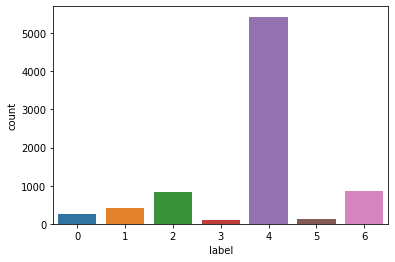

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()

x_train,y_train  = oversample.fit_resample(x_train,y_train)

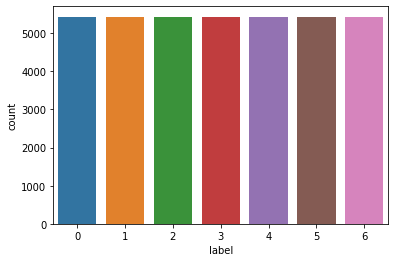

In [ ]:
sns.countplot(y_train)

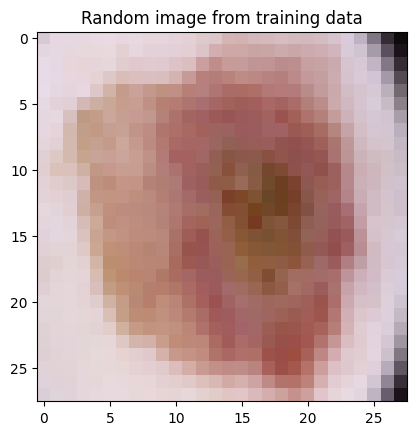

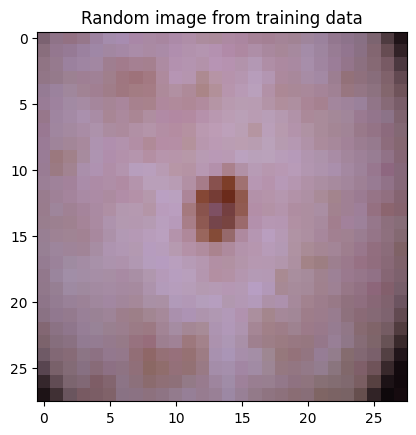

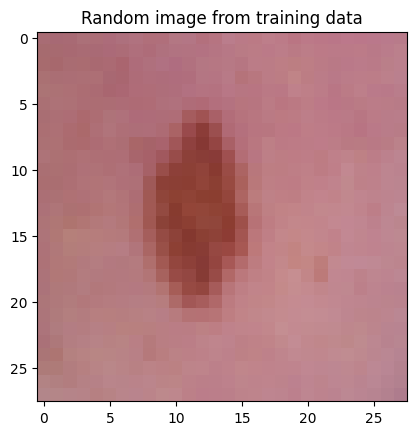

In [ ]:
import matplotlib.pyplot as plt
import random

num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [ ]:
model = Sequential()

model.add(Conv2D(16,
                 kernel_size = (3,3),
                 input_shape = (28, 28, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(256,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                              monitor='val_acc',
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

In [ ]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/50
50/51 [============================>.] - ETA: 0s - loss: 0.0471 - accuracy: 0.9872

51/51 [==============================] - 10s 202ms/step - loss: 0.0475 - accuracy: 0.9870 - val_loss: 1.4113 - val_accuracy: 0.7193
Epoch 2/50
50/51 [============================>.] - ETA: 0s - loss: 0.1538 - accuracy: 0.9506

51/51 [==============================] - 15s 306ms/step - loss: 0.1543 - accuracy: 0.9505 - val_loss: 1.1927 - val_accuracy: 0.7392
Epoch 3/50
50/51 [============================>.] - ETA: 0s - loss: 0.0803 - accuracy: 0.9734

51/51 [==============================] - 18s 354ms/step - loss: 0.0807 - accuracy: 0.9733 - val_loss: 1.2427 - val_accuracy: 0.7286
Epoch 4/50
50/51 [============================>.] - ETA: 0s - loss: 0.0814 - accuracy: 0.9741

51/51 [==============================] - 11s 216ms/step - loss: 0.0820 - accuracy: 0.9739 - val_loss: 1.4339 - val_accuracy: 0.7274
Epoch 5/50
50/51 [============================>.] - ETA: 0s - loss: 0.1140 - accuracy: 0.9638

51/51 [==============================] - 10s 190ms/step - loss: 0.1162 - accuracy: 0.9632 - val_loss: 1.2995 - val_accuracy: 0.7155
Epoch 6/50
50/51 [============================>.] - ETA: 0s - loss: 0.1866 - accuracy: 0.9395

51/51 [==============================] - 10s 188ms/step - loss: 0.1871 - accuracy: 0.9393 - val_loss: 1.2364 - val_accuracy: 0.7174
Epoch 7/50
50/51 [============================>.] - ETA: 0s - loss: 0.1024 - accuracy: 0.9672

51/51 [==============================] - 9s 169ms/step - loss: 0.1028 - accuracy: 0.9671 - val_loss: 1.2297 - val_accuracy: 0.7392
Epoch 8/50
50/51 [============================>.] - ETA: 0s - loss: 0.0628 - accuracy: 0.9802

51/51 [==============================] - 10s 190ms/step - loss: 0.0628 - accuracy: 0.9802 - val_loss: 1.3225 - val_accuracy: 0.7199
Epoch 9/50
50/51 [============================>.] - ETA: 0s - loss: 0.0290 - accuracy: 0.9920

51/51 [==============================] - 10s 192ms/step - loss: 0.0291 - accuracy: 0.9920 - val_loss: 1.3343 - val_accuracy: 0.7424
Epoch 10/50
50/51 [============================>.] - ETA: 0s - loss: 0.0500 - accuracy: 0.9847

51/51 [==============================] - 10s 200ms/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 1.4404 - val_accuracy: 0.7380
Epoch 11/50
50/51 [============================>.] - ETA: 0s - loss: 0.0599 - accuracy: 0.9814

51/51 [==============================] - 8s 164ms/step - loss: 0.0628 - accuracy: 0.9811 - val_loss: 1.6566 - val_accuracy: 0.7124
Epoch 12/50
50/51 [============================>.] - ETA: 0s - loss: 0.1674 - accuracy: 0.9505

51/51 [==============================] - 10s 192ms/step - loss: 0.1675 - accuracy: 0.9504 - val_loss: 1.2168 - val_accuracy: 0.7305
Epoch 13/50
50/51 [============================>.] - ETA: 0s - loss: 0.0587 - accuracy: 0.9825

51/51 [==============================] - 12s 230ms/step - loss: 0.0591 - accuracy: 0.9824 - val_loss: 1.1626 - val_accuracy: 0.7449
Epoch 14/50
50/51 [============================>.] - ETA: 0s - loss: 0.0787 - accuracy: 0.9745

51/51 [==============================] - 10s 188ms/step - loss: 0.0787 - accuracy: 0.9746 - val_loss: 1.4110 - val_accuracy: 0.7211
Epoch 15/50
50/51 [============================>.] - ETA: 0s - loss: 0.0362 - accuracy: 0.9894

51/51 [==============================] - 9s 170ms/step - loss: 0.0362 - accuracy: 0.9894 - val_loss: 1.3048 - val_accuracy: 0.7386
Epoch 16/50
50/51 [============================>.] - ETA: 0s - loss: 0.0185 - accuracy: 0.9953

51/51 [==============================] - 10s 189ms/step - loss: 0.0186 - accuracy: 0.9953 - val_loss: 1.4186 - val_accuracy: 0.7492
Epoch 17/50
50/51 [============================>.] - ETA: 0s - loss: 0.0297 - accuracy: 0.9903

51/51 [==============================] - 10s 191ms/step - loss: 0.0297 - accuracy: 0.9903 - val_loss: 1.4562 - val_accuracy: 0.7280
Epoch 18/50
50/51 [============================>.] - ETA: 0s - loss: 0.0207 - accuracy: 0.9942

51/51 [==============================] - 10s 188ms/step - loss: 0.0207 - accuracy: 0.9942 - val_loss: 1.4404 - val_accuracy: 0.7380
Epoch 19/50
50/51 [============================>.] - ETA: 0s - loss: 0.0160 - accuracy: 0.9950

51/51 [==============================] - 9s 169ms/step - loss: 0.0170 - accuracy: 0.9945 - val_loss: 1.4918 - val_accuracy: 0.7386
Epoch 20/50
50/51 [============================>.] - ETA: 0s - loss: 0.1497 - accuracy: 0.9541

51/51 [==============================] - 10s 189ms/step - loss: 0.1496 - accuracy: 0.9541 - val_loss: 1.3383 - val_accuracy: 0.7411
Epoch 21/50
50/51 [============================>.] - ETA: 0s - loss: 0.0420 - accuracy: 0.9878

51/51 [==============================] - 10s 190ms/step - loss: 0.0421 - accuracy: 0.9877 - val_loss: 1.4232 - val_accuracy: 0.7274
Epoch 22/50
50/51 [============================>.] - ETA: 0s - loss: 0.0363 - accuracy: 0.9892

51/51 [==============================] - 9s 184ms/step - loss: 0.0363 - accuracy: 0.9892 - val_loss: 1.3658 - val_accuracy: 0.7361
Epoch 23/50
50/51 [============================>.] - ETA: 0s - loss: 0.0319 - accuracy: 0.9909

51/51 [==============================] - 8s 163ms/step - loss: 0.0320 - accuracy: 0.9908 - val_loss: 1.5148 - val_accuracy: 0.7461
Epoch 24/50
50/51 [============================>.] - ETA: 0s - loss: 0.0580 - accuracy: 0.9802

51/51 [==============================] - 9s 178ms/step - loss: 0.0580 - accuracy: 0.9802 - val_loss: 1.4378 - val_accuracy: 0.7074
Epoch 25/50
50/51 [============================>.] - ETA: 0s - loss: 0.0387 - accuracy: 0.9884

51/51 [==============================] - 9s 181ms/step - loss: 0.0387 - accuracy: 0.9885 - val_loss: 1.3263 - val_accuracy: 0.7592
Epoch 26/50
50/51 [============================>.] - ETA: 0s - loss: 0.0173 - accuracy: 0.9956

51/51 [==============================] - 9s 180ms/step - loss: 0.0173 - accuracy: 0.9956 - val_loss: 1.3650 - val_accuracy: 0.7636
Epoch 27/50
50/51 [============================>.] - ETA: 0s - loss: 0.0145 - accuracy: 0.9970

51/51 [==============================] - 8s 165ms/step - loss: 0.0145 - accuracy: 0.9970 - val_loss: 1.4459 - val_accuracy: 0.7523
Epoch 28/50
50/51 [============================>.] - ETA: 0s - loss: 0.0089 - accuracy: 0.9983

51/51 [==============================] - 9s 178ms/step - loss: 0.0096 - accuracy: 0.9978 - val_loss: 1.4484 - val_accuracy: 0.7536
Epoch 29/50
50/51 [============================>.] - ETA: 0s - loss: 0.1067 - accuracy: 0.9695

51/51 [==============================] - 9s 179ms/step - loss: 0.1066 - accuracy: 0.9696 - val_loss: 1.5975 - val_accuracy: 0.7218
Epoch 30/50
50/51 [============================>.] - ETA: 0s - loss: 0.0561 - accuracy: 0.9812

51/51 [==============================] - 9s 185ms/step - loss: 0.0564 - accuracy: 0.9811 - val_loss: 1.4000 - val_accuracy: 0.7461
Epoch 31/50
50/51 [============================>.] - ETA: 0s - loss: 0.0612 - accuracy: 0.9812

51/51 [==============================] - 9s 167ms/step - loss: 0.0616 - accuracy: 0.9811 - val_loss: 1.3869 - val_accuracy: 0.7455
Epoch 32/50
50/51 [============================>.] - ETA: 0s - loss: 0.1556 - accuracy: 0.9503

51/51 [==============================] - 9s 177ms/step - loss: 0.1560 - accuracy: 0.9501 - val_loss: 1.4405 - val_accuracy: 0.7043
Epoch 33/50
50/51 [============================>.] - ETA: 0s - loss: 0.1348 - accuracy: 0.9552

51/51 [==============================] - 9s 178ms/step - loss: 0.1353 - accuracy: 0.9551 - val_loss: 1.3914 - val_accuracy: 0.7024
Epoch 34/50
50/51 [============================>.] - ETA: 0s - loss: 0.1463 - accuracy: 0.9542

51/51 [==============================] - 9s 179ms/step - loss: 0.1461 - accuracy: 0.9543 - val_loss: 1.1642 - val_accuracy: 0.7455
Epoch 35/50
50/51 [============================>.] - ETA: 0s - loss: 0.0460 - accuracy: 0.9867

51/51 [==============================] - 9s 177ms/step - loss: 0.0471 - accuracy: 0.9864 - val_loss: 1.4285 - val_accuracy: 0.7274
Epoch 36/50
50/51 [============================>.] - ETA: 0s - loss: 0.1551 - accuracy: 0.9478

51/51 [==============================] - 9s 169ms/step - loss: 0.1549 - accuracy: 0.9479 - val_loss: 1.3667 - val_accuracy: 0.7405
Epoch 37/50
50/51 [============================>.] - ETA: 0s - loss: 0.0388 - accuracy: 0.9886

51/51 [==============================] - 9s 186ms/step - loss: 0.0387 - accuracy: 0.9886 - val_loss: 1.3637 - val_accuracy: 0.7511
Epoch 38/50
50/51 [============================>.] - ETA: 0s - loss: 0.0196 - accuracy: 0.9950

51/51 [==============================] - 9s 177ms/step - loss: 0.0204 - accuracy: 0.9947 - val_loss: 1.4010 - val_accuracy: 0.7523
Epoch 39/50
50/51 [============================>.] - ETA: 0s - loss: 0.0595 - accuracy: 0.9820

51/51 [==============================] - 9s 182ms/step - loss: 0.0595 - accuracy: 0.9821 - val_loss: 1.4384 - val_accuracy: 0.7324
Epoch 40/50
50/51 [============================>.] - ETA: 0s - loss: 0.0176 - accuracy: 0.9959

51/51 [==============================] - 8s 164ms/step - loss: 0.0180 - accuracy: 0.9958 - val_loss: 1.4559 - val_accuracy: 0.7411
Epoch 41/50
50/51 [============================>.] - ETA: 0s - loss: 0.1657 - accuracy: 0.9519

51/51 [==============================] - 9s 178ms/step - loss: 0.1663 - accuracy: 0.9518 - val_loss: 1.2925 - val_accuracy: 0.7318
Epoch 42/50
50/51 [============================>.] - ETA: 0s - loss: 0.0685 - accuracy: 0.9797

51/51 [==============================] - 9s 179ms/step - loss: 0.0699 - accuracy: 0.9794 - val_loss: 1.2245 - val_accuracy: 0.7505
Epoch 43/50
50/51 [============================>.] - ETA: 0s - loss: 0.0898 - accuracy: 0.9731

51/51 [==============================] - 9s 183ms/step - loss: 0.0908 - accuracy: 0.9730 - val_loss: 1.2169 - val_accuracy: 0.7349
Epoch 44/50
50/51 [============================>.] - ETA: 0s - loss: 0.0362 - accuracy: 0.9906

51/51 [==============================] - 9s 173ms/step - loss: 0.0361 - accuracy: 0.9906 - val_loss: 1.2194 - val_accuracy: 0.7586
Epoch 45/50
50/51 [============================>.] - ETA: 0s - loss: 0.0190 - accuracy: 0.9953

51/51 [==============================] - 9s 178ms/step - loss: 0.0190 - accuracy: 0.9953 - val_loss: 1.2817 - val_accuracy: 0.7492
Epoch 46/50
50/51 [============================>.] - ETA: 0s - loss: 0.0142 - accuracy: 0.9964

51/51 [==============================] - 9s 184ms/step - loss: 0.0142 - accuracy: 0.9964 - val_loss: 1.4516 - val_accuracy: 0.7467
Epoch 47/50
50/51 [============================>.] - ETA: 0s - loss: 0.0106 - accuracy: 0.9973

51/51 [==============================] - 9s 183ms/step - loss: 0.0106 - accuracy: 0.9973 - val_loss: 1.4402 - val_accuracy: 0.7505
Epoch 48/50
50/51 [============================>.] - ETA: 0s - loss: 0.0105 - accuracy: 0.9969

51/51 [==============================] - 9s 184ms/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 1.4941 - val_accuracy: 0.7430
Epoch 49/50
50/51 [============================>.] - ETA: 0s - loss: 0.0082 - accuracy: 0.9981

51/51 [==============================] - 9s 169ms/step - loss: 0.0088 - accuracy: 0.9980 - val_loss: 1.5162 - val_accuracy: 0.7405
Epoch 50/50
50/51 [============================>.] - ETA: 0s - loss: 0.1281 - accuracy: 0.9616

51/51 [==============================] - 10s 187ms/step - loss: 0.1280 - accuracy: 0.9616 - val_loss: 1.2719 - val_accuracy: 0.7386
Duration: 0:08:22.000251


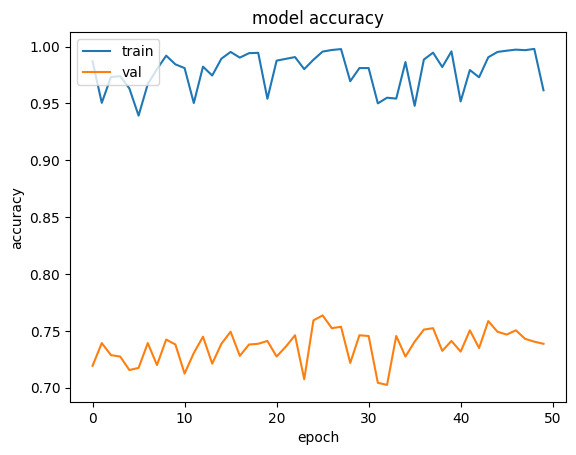

In [ ]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()


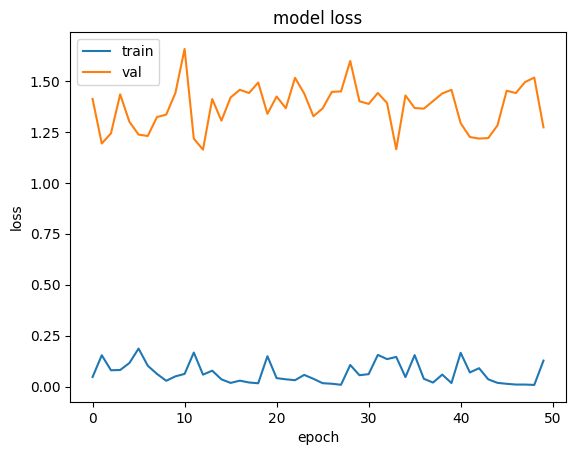

In [ ]:
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()